# Pandas Groupby
## Quizz 16

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [2]:
# Change False to True for each block of code to see what it does

# Examine DataFrame
if True:
    print example_df

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [3]:
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [4]:
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [5]:
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [6]:
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [7]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

In [8]:
subway_df.head()

UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   
2  R003  05-01-11  12:00:00   4388333  2911002              0.0   
3  R003  05-01-11  16:00:00   4388333  2911002              0.0   
4  R003  05-01-11  20:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   
2            0.0  2011-05-01 12:00:00    12         6     ...           30.28   
3            0.0  2011-05-01 16:00:00    16         6     ...           30.26   
4            0.0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0         30.258      55.98       7.86   
1    0   52.0    3.5         0.0         30.258      55.98       7.86   
2    0   62.1    6.9         0.0         30.258      55.98       7.86   
3    0   57.9   15.0         0.0         30.258      55.98       7.86   
4    0   52.0   10.4         0.0         30.258      55.98       7.86   

   weather_lat  weather_lon  
0    40.700348   -73.887177  
1    40.700348   -73.887177  
2    40.700348   -73.887177  
3    40.700348   -73.887177  
4    40.700348   -73.887177  

[5 rows x 27 columns]

In [9]:
grouped_data = subway_df.groupby(['UNIT','DATEn','hour'])
#print grouped_data.groups
print grouped_data.sum()['rain']
print grouped_data.mean()['ENTRIESn_hourly']

UNIT  DATEn     hour
R003  05-01-11  0       0
                4       0
                12      0
                16      0
                20      0
      05-02-11  0       0
                4       0
                8       0
                12      0
                16      0
                20      0
      05-03-11  0       0
                4       0
                12      0
                16      0
                20      0
      05-04-11  0       1
                4       1
                8       1
                12      1
                16      1
                20      1
      05-05-11  0       0
                4       0
                12      0
                16      0
                20      0
      05-06-11  0       0
                4       0
                12      0
                       ..
R464  05-26-11  16      0
                20      0
      05-27-11  0       0
                4       0
                12      0
                16      0
                2

In [21]:
grouped_data = subway_df.groupby(['day_week'])
ridership_byday = grouped_data.mean()['ENTRIESn_hourly']

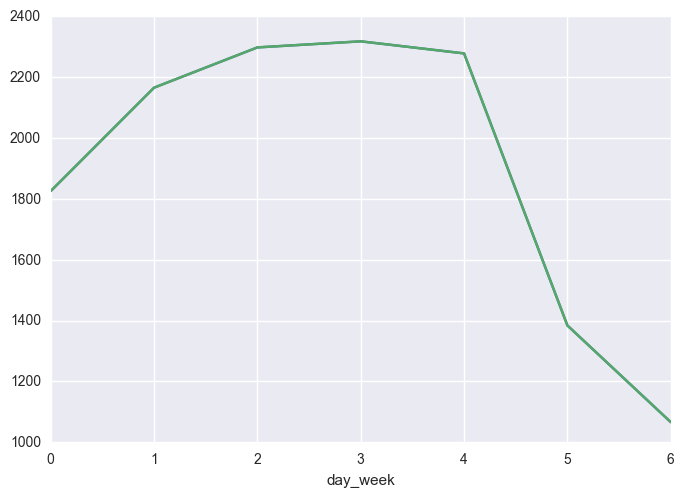

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ridership_byday.plot()
plt.show()